# Models

## Linear Models

In [1]:
import tprstats
import pandas as pd
import numpy as np
coffee_data = pd.read_excel('../data/Coffee_Data.xlsx', engine='openpyxl')
diamonds_211 = pd.read_excel('../data/Diamonds_211.xlsx', engine='openpyxl')

### Create a Model
To create a model, use the `tprstats.model()` function providing the name, formula, and data used in the model. The `tprstats.model()` function will automatically run a regression to fit the data.

Models:
- Cross-sectional linear models `name = "cs"`.
- Time series linear models `name = "ts"`.
- Logit Binary Choice models `name = "logit"`.
- Probit Binary Choice models `name = "probit"`.

In [2]:
model_diamond = tprstats.model(name="cs", formula='Price ~ Carat + C(Clarity)', data=diamonds_211)
print(type(model_diamond))

<class 'tprstats.models.StatsmodelsLinearModelsWrapper'>


### Summary Statistics

In [3]:
model_diamond.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
No. Observations:                 211   F-statistic:                     1019.
Covariance Type:            nonrobust   Prob (F-statistic):          4.21e-149
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.241e+04    461.650    -26.886      0.000   -1.33e+04   -1.15e+04
C(Clarity)[T.3]  4254.2767    368.295     11.551      0.000    3528.124    4980.430
C(Clarity)[T.4]  5942.2429    367.162     16.184      0.000    5218.325    6666.161
C(Clarity)[T.5]  7089.8345    376.465     18.833      0.000    6347.573    7832.096
C(Clarity)[T.6]  7688.9068    464.874     16.540      0.000    6772.333    8605.480
C(Clarity)[T.8]  9160.7157    545.092     16.806      0.000    8085.979    1.02e+04
Carat            1.235e+04    162.047     76.226      0.000     1.2e+04    1.27e+04
===================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Prediction
#### Model and New Data

In [4]:
model_coffee_ts = tprstats.model(name = "ts", formula='cons~rpcarb+rpcinc+rpcofe', data=coffee_data)
# model_coffee_ts_logs = tprstats.model(name = "ts", formula='log(cons)~log(rpcarb)+log(rpcinc)+log(rpcofe)', data=coffee_data)

In [5]:
# new data for prediction
Xnew_coffee =pd.DataFrame({
    "rpcarb": [93, 76, 151],
    "rpcinc": [24, 27, 16],
    "rpcofe": [100, 95, 74]
})

#### Prediction Intervals

In [6]:
model_coffee_ts.prediction_intervals(Xnew_coffee)

,Predicted,Lower,Upper
0,10.143979,9.021145,11.266813
1,9.045275,7.911948,10.178602
2,14.710292,13.575637,15.844946


### Scaled Ceofficients
Scaled coefficient including standardized coefficients and elasticities can be accessed via the `scaled_coefficients` function.

In [7]:
model_coffee_ts.scaled_coefficients()

,coefs,std_coefs,elasticities
rpcarb,0.090120,1.356548,0.8475
rpcinc,0.123477,0.412841,0.2540
rpcofe,-0.012582,-0.116004,-0.1065


#### Elasticities
To access just the elasticities, use the `elasticities` function.

In [8]:
model_coffee_ts.elasticities()

rpcarb    0.8475
rpcinc    0.2540
rpcofe   -0.1065
dtype: float64

#### Standardized Coefficients
To access just the standardized coefficients, use the `standardized_coefficients` function.

In [9]:
model_coffee_ts.standardized_coefficients()

rpcarb    1.356548
rpcinc    0.412841
rpcofe   -0.116004
dtype: float64

### Plots
#### Plot Actual vs. Fitted Values

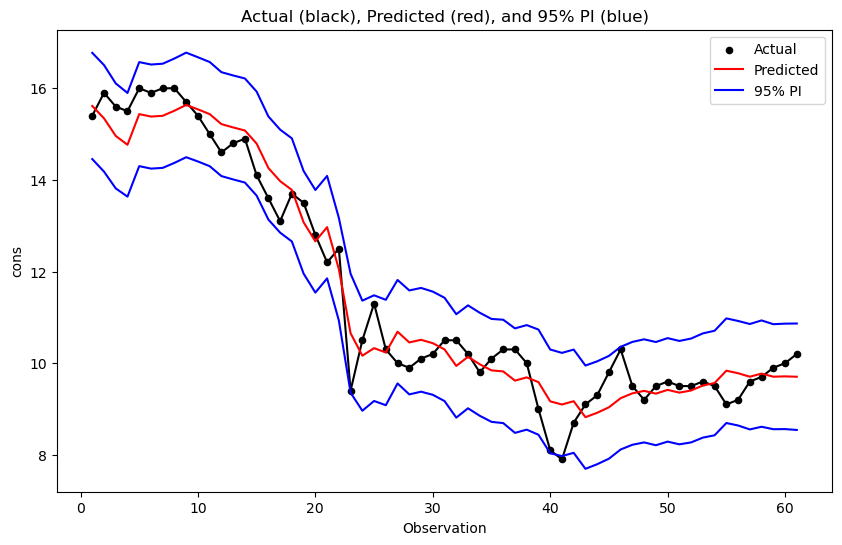

In [10]:
model_coffee_ts.plot_actual_fitted()

In [11]:
model_coffee_ts.wald_testing('(rpcofe = -0.018, rpcarb = 0.065)')

Wald Test Statistic:  9.14129210335548
p-value:  0.0003602795459282585


In [ ]:
model_coffee_ts.wald_test(r_matrix='(rpcofe = -0.018, rpcarb = 0.065)', use_f=True, scalar=True)

/workspaces/tprstats-python/.pixi/envs/default/lib/python3.12/site-packages/statsmodels/base/model.py:1863: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  params = self.params.ravel(order="F")


TypeError: unsupported operand type(s) for *: 'method' and 'float'

## Binary Choice Models

In [12]:
# setup
import pandas as pd
import tprstats
solar = pd.read_excel('../data/Solar_Data.xlsx').dropna()
solar_new = pd.read_excel('../data/Solar_New_Prospects.xlsx')

### Tests

#### Wald Test

In [13]:
#### Ramsey Test (RESET)

## Binary Choice Models

In [14]:
# setup
import pandas as pd
import tprstats
solar = pd.read_excel('../data/Solar_Data.xlsx').dropna()
solar_new = pd.read_excel('../data/Solar_New_Prospects.xlsx')

### Logit

In [15]:
# use C(DrivesHybrid) to test Logit works with categorical variables
solar_logit=tprstats.model("logit",formula="Sale~AnnualSave+AnnualCost+C(DrivesHybrid)+NearbySolar+HomeValue",data=solar)
solar_logit.summary()

Optimization terminated successfully.
         Current function value: 0.102926
         Iterations 9


AttributeError: 'LogitModel' object has no attribute 'summary'

In [ ]:
solar_logit.predict()

In [ ]:
solar_logit.classification_table()

In [ ]:
X_out_of_sample = pd.DataFrame({
    "AnnualSave": [2.5, 1.9, 2.3],
    "AnnualCost": [1.8, 1.5, 1.7],
    "DrivesHybrid": [1,0,0],
    "NearbySolar": [0, 1, 0],
    "HomeValue": [550, 675, 495]
})
print("We create three homes: ")
print(X_out_of_sample)
print("Predicted Probabilities of purchase for the three homes are: ")
print(solar_logit.predict(X_out_of_sample))

In [ ]:
# marginal effects
solar_logit.marginal_effects()

In [ ]:
solar_logit.predict(solar_new)

In [ ]:
solar_logit.predict_and_rank(solar_new)

### Probit

In [ ]:
solar_probit=tprstats.model("probit",formula="Sale~AnnualSave+AnnualCost+C(DrivesHybrid)+NearbySolar+HomeValue",data=solar)

In [ ]:
solar_probit.summary()

In [ ]:
solar_probit.predict()

In [ ]:
print("Predicted Probabilities of purchase for the three synthetic homes in X_out_of_sample using probit.predict:")
print(solar_probit.predict(X_out_of_sample))

In [ ]:
solar_probit.classification_table()

In [ ]:
solar_probit.marginal_effects()

In [ ]:
solar_probit.predict_and_rank(solar_new)